In [2]:
pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=fd52bcf04ab35c87caa5d506694575031262a55385d1f3f3dd0d6bd55b1a493c
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [3]:
import wget
path ='https://www.kaggle.com/api/v1/datasets/download/snmahsa/animal-image-dataset-cats-dogs-and-foxes?dataset_version_number=1'
wget.download(path, 'animal_dataset.zip')

'animal_dataset.zip'

In [4]:
import zipfile
# 檔案名稱
file='animal_dataset.zip'
ZIP = zipfile.ZipFile(file)
ZIP.extractall()
ZIP.close()

# **1. 請輸出資料分布**

每個資料夾的圖片數量: {'cat': 101, 'dog': 105, 'fox': 102}


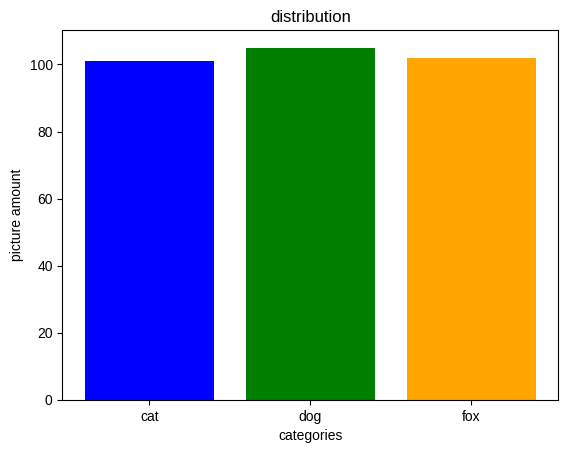

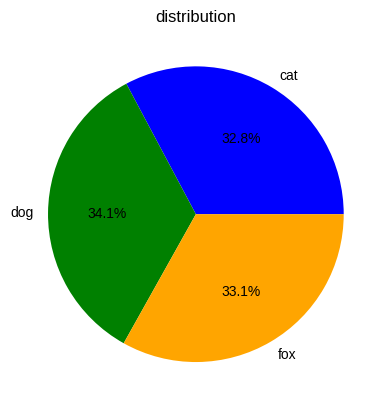

In [16]:
import os
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 設置默認字型為英文字型
rcParams['font.sans-serif'] = ['Liberation Sans']
rcParams['axes.unicode_minus'] = False


# 設定資料夾路徑
base_dir = "/content/Animal Image Dataset-Cats, Dogs, and Foxes"  # 替換為你的資料夾路徑
categories = ["cat", "dog", "fox"]  # 資料夾名稱

# 初始化統計結果
image_counts = {}

# 統計每個資料夾中的圖片數量
for category in categories:
    folder_path = os.path.join(base_dir, category)
    if os.path.exists(folder_path):
        # 計算圖片數量（只統計常見圖片格式）
        image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        image_counts[category] = len(image_files)
    else:
        print(f"資料夾不存在: {folder_path}")
        image_counts[category] = 0

# 打印統計結果
print("每個資料夾的圖片數量:", image_counts)

# 視覺化數據（直方圖）
plt.bar(image_counts.keys(), image_counts.values(), color=['blue', 'green', 'orange'])
plt.title("distribution")
plt.xlabel("categories")
plt.ylabel("picture amount")
plt.show()

# 視覺化數據（圓餅圖）
plt.pie(image_counts.values(), labels=image_counts.keys(), autopct='%1.1f%%', colors=['blue', 'green', 'orange'])
plt.title("distribution")
plt.show()


# **2. 請利用資料擴增將各類圖形增加資料**
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import os

# 原始資料路徑
base_dir = "/content/Animal Image Dataset-Cats, Dogs, and Foxes"
categories = ["cat", "dog", "fox"]  # 定義類別名稱

# 增強後的資料儲存路徑
augmented_base_dir = "/content/Augmented_Animal_Dataset"
os.makedirs(augmented_base_dir, exist_ok=True)

# 初始化 ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=15,       # 旋轉範圍
    width_shift_range=0.2,   # 水平平移範圍
    height_shift_range=0.2,  # 垂直平移範圍
    shear_range=0.2,         # 剪切變換範圍
    zoom_range=0.2,          # 縮放範圍
    horizontal_flip=True,    # 水平翻轉
    fill_mode='nearest'      # 填充模式
)

# 為每個類別進行資料增強
for category in categories:
    original_category_dir = os.path.join(base_dir, category)
    augmented_category_dir = os.path.join(augmented_base_dir, category)
    os.makedirs(augmented_category_dir, exist_ok=True)

    # 處理每張圖片
    for img_name in os.listdir(original_category_dir):
        img_path = os.path.join(original_category_dir, img_name)
        if img_path.endswith(('jpg', 'jpeg', 'png')):  # 確保是圖片格式
            # 讀取圖片
            img = tf.keras.utils.load_img(img_path)
            img_array = tf.keras.utils.img_to_array(img)
            img_array = img_array.reshape((1,) + img_array.shape)  # 調整形狀

            # 使用 ImageDataGenerator 增強圖片
            i = 0
            for batch in datagen.flow(img_array, batch_size=1,
                                      save_to_dir=augmented_category_dir,
                                      save_prefix="aug",
                                      save_format="jpeg"):
                i += 1
                if i >= 1:  # 每張圖片生成 5 張增強圖片
                    break

print("資料增強完成！增強後的資料已儲存於：", augmented_base_dir)

資料增強完成！增強後的資料已儲存於： /content/Augmented_Animal_Dataset


# **3. 請將資料分成訓練集和測試集**

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# 定義路徑
original_base_dir = "/content/Animal Image Dataset-Cats, Dogs, and Foxes"
augmented_base_dir = "/content/Augmented_Animal_Dataset"
train_dir = "/content/Train_Dataset"
test_dir = "/content/Test_Dataset"

# 建立訓練集與測試集資料夾
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# 定義類別名稱
categories = ["cat", "dog", "fox"]

# 分割比例
test_size = 0.25  # 測試集佔 20%

# 處理每個類別
for category in categories:
    # 原始資料夾
    original_category_dir = os.path.join(original_base_dir, category)
    augmented_category_dir = os.path.join(augmented_base_dir, category)

    # 合併原始資料與增強後的資料
    all_images = []
    if os.path.exists(original_category_dir):
        all_images.extend([os.path.join(original_category_dir, img) for img in os.listdir(original_category_dir) if img.endswith(('jpg', 'jpeg', 'png'))])
    if os.path.exists(augmented_category_dir):
        all_images.extend([os.path.join(augmented_category_dir, img) for img in os.listdir(augmented_category_dir) if img.endswith(('jpg', 'jpeg', 'png'))])

    # 分割訓練集與測試集
    train_images, test_images = train_test_split(all_images, test_size=test_size, random_state=42)

    # 建立類別資料夾
    train_category_dir = os.path.join(train_dir, category)
    test_category_dir = os.path.join(test_dir, category)
    os.makedirs(train_category_dir, exist_ok=True)
    os.makedirs(test_category_dir, exist_ok=True)

    # 複製圖片到訓練集
    for img_path in train_images:
        shutil.copy(img_path, train_category_dir)

    # 複製圖片到測試集
    for img_path in test_images:
        shutil.copy(img_path, test_category_dir)

print("資料分割完成！")
print("訓練集儲存在：", train_dir)
print("測試集儲存在：", test_dir)

資料分割完成！
訓練集儲存在： /content/Train_Dataset
測試集儲存在： /content/Test_Dataset


# 過程


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array
import os

# 訓練集和測試集路徑
train_dir = "/content/Train_Dataset"
test_dir = "/content/Test_Dataset"

# 圖片大小設定
IMG_SIZE = (150, 150)
BATCH_SIZE = 32

# 1. 資料預處理
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# 2. 建立模型
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 分類數為 3：貓、狗、狐狸
])

# 顯示模型架構
model.summary()

# 3. 編譯模型
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 4. 訓練模型
EPOCHS = 8
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=test_generator
)

# 5. 評估模型
loss, accuracy = model.evaluate(test_generator)
print(f"測試集準確率: {accuracy * 100:.2f}%")

# 6. 儲存模型
model.save("/content/animal_classifier_model.h5")
print("模型已儲存！")

# 7. 測試模型預測
def predict_image(image_path, model, train_generator):
    try:
        # 檢查測試圖片是否存在
        if not os.path.exists(image_path):
            print(f"圖片路徑不存在: {image_path}")
            return

        # 加載並處理圖片
        img = load_img(image_path, target_size=IMG_SIZE)
        img_array = img_to_array(img) / 255.0  # 標準化
        img_array = np.expand_dims(img_array, axis=0)

        # 預測
        predictions = model.predict(img_array)
        class_indices = train_generator.class_indices
        class_labels = {v: k for k, v in class_indices.items()}
        predicted_class = class_labels[np.argmax(predictions)]
        confidence = np.max(predictions)

        # 顯示預測結果
        print(f"預測結果: {predicted_class} (信心度: {confidence * 100:.2f}%)")
        return predicted_class
    except Exception as e:
        print(f"預測時發生錯誤: {e}")

# 測試用例
test_image_dir = "/content/Test_Dataset/cat"
test_images = os.listdir(test_image_dir)

if test_images:
    # 選擇第一張圖片進行測試
    test_image_path = os.path.join(test_image_dir, test_images[0])
    print(f"正在使用圖片進行測試: {test_image_path}")
    predict_image(test_image_path, model, train_generator)
else:
    print("測試資料夾中沒有圖片！")

Found 459 images belonging to 3 classes.
Found 155 images belonging to 3 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                        

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 96ms/step
預測結果: cat (信心度: 85.02%)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array
import os

# 訓練集和測試集路徑
train_dir = "/content/Train_Dataset"
test_dir = "/content/Test_Dataset"

# 圖片大小設定
IMG_SIZE = (150, 150)
BATCH_SIZE = 32

# 1. 資料預處理
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# 2. 建立模型，使用 LeakyReLU 激活函數
model = Sequential([
    Conv2D(32, (3, 3), input_shape=(150, 150, 3)),
    LeakyReLU(alpha=0.1),  # LeakyReLU 激活函數
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3)),
    LeakyReLU(alpha=0.1),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3)),
    LeakyReLU(alpha=0.1),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128),
    LeakyReLU(alpha=0.1),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 分類數為 3：貓、狗、狐狸
])

# 顯示模型架構
model.summary()

# 3. 編譯模型
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 4. 訓練模型
EPOCHS = 10
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=test_generator
)

# 5. 評估模型
loss, accuracy = model.evaluate(test_generator)
print(f"測試集準確率: {accuracy * 100:.2f}%")

# 6. 儲存模型
model.save("/content/animal_classifier_leakyrelu_model.h5")
print("模型已儲存！")

# 7. 測試模型預測
def predict_image(image_path, model, train_generator):
    try:
        # 檢查測試圖片是否存在
        if not os.path.exists(image_path):
            print(f"圖片路徑不存在: {image_path}")
            return

        # 加載並處理圖片
        img = load_img(image_path, target_size=IMG_SIZE)
        img_array = img_to_array(img) / 255.0  # 標準化
        img_array = np.expand_dims(img_array, axis=0)

        # 預測
        predictions = model.predict(img_array)
        class_indices = train_generator.class_indices
        class_labels = {v: k for k, v in class_indices.items()}
        predicted_class = class_labels[np.argmax(predictions)]
        confidence = np.max(predictions)

        # 顯示預測結果
        print(f"預測結果: {predicted_class} (信心度: {confidence * 100:.2f}%)")
        return predicted_class
    except Exception as e:
        print(f"預測時發生錯誤: {e}")

# 測試用例
test_image_dir = "/content/Test_Dataset/cat"
test_images = os.listdir(test_image_dir)

if test_images:
    # 選擇第一張圖片進行測試
    test_image_path = os.path.join(test_image_dir, test_images[0])
    print(f"正在使用圖片進行測試: {test_image_path}")
    predict_image(test_image_path, model, train_generator)
else:
    print("測試資料夾中沒有圖片！")

Found 459 images belonging to 3 classes.
Found 155 images belonging to 3 classes.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 72, 72, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array
import os

# 訓練集和測試集路徑
train_dir = "/content/Train_Dataset"
test_dir = "/content/Test_Dataset"

# 圖片大小設定（降低解析度至 128x128）
IMG_SIZE = (128, 128)
BATCH_SIZE = 64

# 1. 資料預處理
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# 2. 建立輕量化模型
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 分類數為 3：貓、狗、狐狸
])

# 顯示模型架構
model.summary()

# 3. 編譯模型
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 4. 訓練模型（快速訓練）
EPOCHS = 5  # 減少 epoch 數量
STEPS_PER_EPOCH = train_generator.samples // BATCH_SIZE

history = model.fit(
    train_generator,
    steps_per_epoch=STEPS_PER_EPOCH,
    epochs=EPOCHS
)

# 5. 訓練完成後進行驗證評估
loss, accuracy = model.evaluate(test_generator)
print(f"測試集準確率 (val_accuracy): {accuracy * 100:.2f}%")

# 6. 儲存模型
model.save("/content/animal_classifier_fast_model.h5")
print("模型已儲存！")

# 7. 測試模型預測
def predict_image(image_path, model, train_generator):
    try:
        # 檢查測試圖片是否存在
        if not os.path.exists(image_path):
            print(f"圖片路徑不存在: {image_path}")
            return

        # 加載並處理圖片
        img = load_img(image_path, target_size=IMG_SIZE)
        img_array = img_to_array(img) / 255.0  # 標準化
        img_array = np.expand_dims(img_array, axis=0)

        # 預測
        predictions = model.predict(img_array)
        class_indices = train_generator.class_indices
        class_labels = {v: k for k, v in class_indices.items()}
        predicted_class = class_labels[np.argmax(predictions)]
        confidence = np.max(predictions)

        # 顯示預測結果
        print(f"預測結果: {predicted_class} (信心度: {confidence * 100:.2f}%)")
        return predicted_class
    except Exception as e:
        print(f"預測時發生錯誤: {e}")

# 測試用例
test_image_dir = "/content/Test_Dataset/cat"
test_images = os.listdir(test_image_dir)

if test_images:
    # 選擇第一張圖片進行測試
    test_image_path = os.path.join(test_image_dir, test_images[0])
    print(f"正在使用圖片進行測試: {test_image_path}")
    predict_image(test_image_path, model, train_generator)
else:
    print("測試資料夾中沒有圖片！")

Found 459 images belonging to 3 classes.
Found 155 images belonging to 3 classes.
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization (Batch  (None, 63, 63, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_7 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                 

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# 訓練集和測試集路徑
train_dir = "/content/Train_Dataset"
test_dir = "/content/Test_Dataset"

# 圖片大小設定
IMG_SIZE = (150, 150)
BATCH_SIZE = 32

# 1. 資料預處理
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# 2. 建立模型
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 分類數為 3：貓、狗、狐狸
])

# 顯示模型架構
model.summary()

# 3. 編譯模型
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 4. 訓練模型
EPOCHS = 10
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=test_generator
)

# 5. 評估模型
loss, accuracy = model.evaluate(test_generator)
print(f"測試集準確率: {accuracy * 100:.2f}%")

# 6. 儲存模型
model.save("/content/animal_classifier_model.h5")
print("模型已儲存！")

# 7. 測試模型預測
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array

def predict_image(image_path):
    img = load_img(image_path, target_size=IMG_SIZE)
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    predictions = model.predict(img_array)
    class_indices = train_generator.class_indices
    class_labels = {v: k for k, v in class_indices.items()}
    predicted_class = class_labels[np.argmax(predictions)]
    confidence = np.max(predictions)

    print(f"預測結果: {predicted_class} (信心度: {confidence * 100:.2f}%)")
    return predicted_class

# 測試用例
test_image_path = "/content/Test_Dataset/cat/aug_0_1964"  # 替換為你的測試圖片路徑
predict_image(test_image_path)

Found 491 images belonging to 3 classes.
Found 155 images belonging to 3 classes.
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 128)       73856     
                                      

FileNotFoundError: [Errno 2] No such file or directory: '/content/Test_Dataset/cat/aug_0_1964'

# **4. 請建立分類模型，將圖形進行辨識**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import ReduceLROnPlateau
import os
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array

# 訓練集和測試集路徑
train_dir = "/content/Train_Dataset"
test_dir = "/content/Test_Dataset"

# 圖片大小設定（MobileNetV2 標準大小為 224x224）
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# 1. 資料預處理（包含資料增強）
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# 2. 使用 MobileNetV2 預訓練模型
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # 凍結預訓練模型權重

# 3. 建立模型
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 分類數為 3：貓、狗、狐狸
])

# 顯示模型架構
model.summary()

# 4. 編譯模型
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 5. 訓練模型（使用學習率調整）
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=2, min_lr=1e-6)
EPOCHS = 10
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    callbacks=[reduce_lr]
)

# 解凍部分預訓練模型權重進行微調
base_model.trainable = True
fine_tune_at = len(base_model.layers) // 2  # 解凍後半部分層數
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# 使用較低學習率進行微調
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 進行微調訓練
FINE_TUNE_EPOCHS = 5
history_fine_tune = model.fit(
    train_generator,
    epochs=FINE_TUNE_EPOCHS,
    validation_data=test_generator,
    callbacks=[reduce_lr]
)

# 6. 評估模型
loss, accuracy = model.evaluate(test_generator)
print(f"測試集準確率: {accuracy * 100:.2f}%")

# 7. 儲存模型
model.save("/content/animal_classifier_mobilenet_model.h5")
print("模型已儲存！")

# 8. 測試模型預測
def predict_image(image_path, model, train_generator):
    try:
        # 檢查測試圖片是否存在
        if not os.path.exists(image_path):
            print(f"圖片路徑不存在: {image_path}")
            return

        # 加載並處理圖片
        img = load_img(image_path, target_size=IMG_SIZE)
        img_array = img_to_array(img) / 255.0  # 標準化
        img_array = np.expand_dims(img_array, axis=0)

        # 預測
        predictions = model.predict(img_array)
        class_indices = train_generator.class_indices
        class_labels = {v: k for k, v in class_indices.items()}
        predicted_class = class_labels[np.argmax(predictions)]
        confidence = np.max(predictions)

        # 顯示預測結果
        print(f"預測結果: {predicted_class} (信心度: {confidence * 100:.2f}%)")
        return predicted_class
    except Exception as e:
        print(f"預測時發生錯誤: {e}")

# 測試用例
test_image_dir = "/content/Test_Dataset/cat"
test_images = os.listdir(test_image_dir)

if test_images:
    # 選擇第一張圖片進行測試
    test_image_path = os.path.join(test_image_dir, test_images[0])
    print(f"正在使用圖片進行測試: {test_image_path}")
    predict_image(test_image_path, model, train_generator)
else:
    print("測試資料夾中沒有圖片！")

Found 459 images belonging to 3 classes.
Found 155 images belonging to 3 classes.
9406464/9406464 [==============================] - 0s 0us/step
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_6 (Dense)             (None, 128)               163968    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 3)   